In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('HR_Analytics_cleaned.csv')
df

,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,3,Male,...,1,No,3,3,0,2,3,0,0,0.0
1,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,4,Female,...,1,No,3,1,0,2,3,0,0,0.0
2,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,2,Male,...,1,Yes,3,4,0,3,3,0,0,0.0
3,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,2,Male,...,1,No,3,4,0,2,3,0,0,0.0
4,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,3,Male,...,1,No,3,4,0,0,3,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,Female,...,5,No,3,4,0,5,1,8,11,10.0
1419,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,3,Female,...,4,No,3,4,0,5,4,13,13,11.0
1420,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,Male,...,8,No,3,4,0,1,3,2,2,2.0
1421,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,2,Male,...,0,Yes,3,2,1,3,3,7,1,9.0


In [3]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

In [4]:
# 先做 Ordinal encoding 
ordinal_cols = ['AgeGroup', 'SalarySlab']
encoder = OrdinalEncoder()
x[ordinal_cols] = encoder.fit_transform(x[ordinal_cols])

# One-hot encoding
x = pd.get_dummies(x, columns=['BusinessTravel', 'Department', 'EducationField',
                               'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
                   drop_first=True)

In [5]:
x

,AgeGroup,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.0,230,3,3,3,54,3,1,3,1420,...,True,False,False,False,False,False,False,False,True,False
1,0.0,812,10,3,4,69,2,1,3,1200,...,False,False,False,False,False,False,True,False,True,False
2,0.0,1306,5,3,2,69,3,1,2,1878,...,False,False,False,False,False,False,True,False,True,True
3,0.0,287,5,2,2,73,3,1,4,1051,...,False,False,False,False,True,False,False,False,True,False
4,0.0,247,8,1,3,80,3,1,3,1904,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,4.0,422,7,3,1,41,3,5,1,19566,...,False,True,False,False,False,False,False,True,False,False
1419,4.0,1499,28,3,3,80,2,3,1,10266,...,False,False,False,False,False,True,False,True,False,False
1420,4.0,1179,16,4,1,84,3,2,1,5405,...,False,False,False,False,False,True,False,False,True,False
1421,4.0,696,7,4,2,52,4,2,4,5220,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(x, y)

DecisionTreeClassifier(max_depth=4)

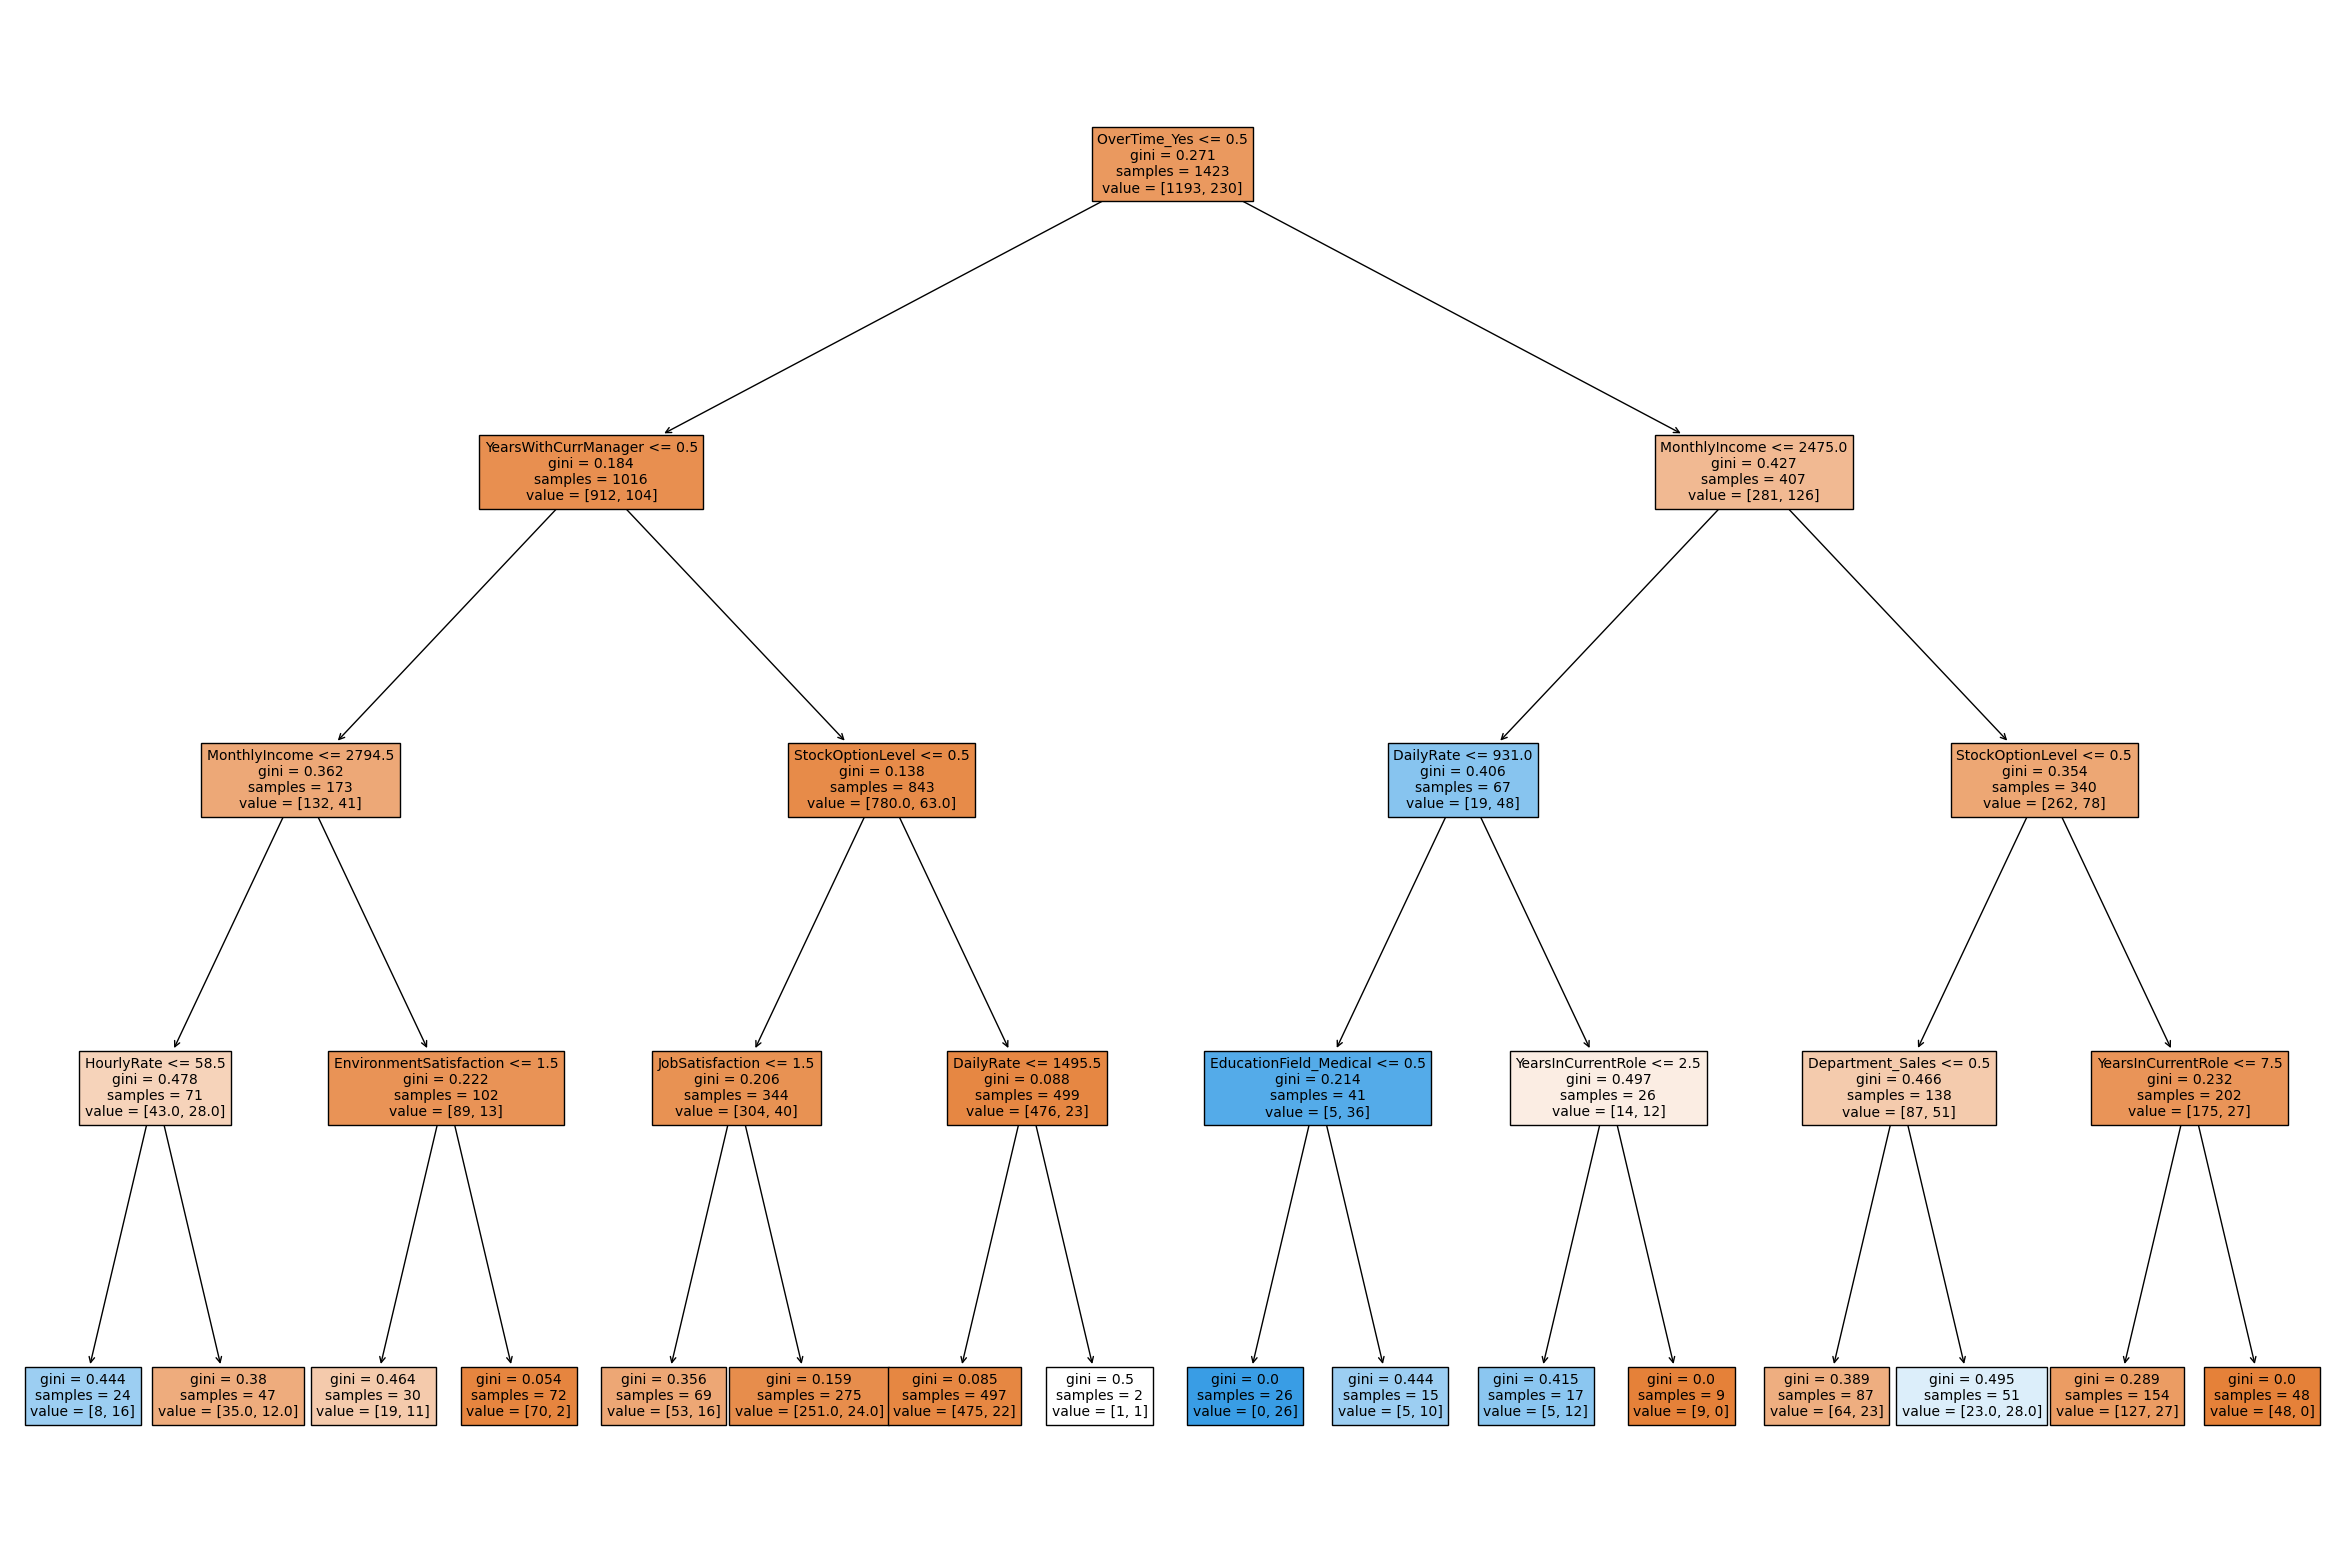

In [9]:
plt.figure(figsize=(30,20))
plot_tree(model, feature_names=x.columns, filled=True, fontsize=10)
plt.show()

In [16]:
from sklearn.tree import export_text

features = ['MonthlyIncome', 'OverTime', 'YearsWithCurrManager']
X = df[features].copy()
X['OverTime'] = X['OverTime'].map({'Yes':1, 'No':0})

y = df['Attrition'].map({'Yes':1, 'No':0})

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

r = export_text(clf, feature_names=list(X.columns))
print(r)


|--- OverTime <= 0.50
|   |--- YearsWithCurrManager <= 0.50
|   |   |--- MonthlyIncome <= 2794.50
|   |   |   |--- class: 0
|   |   |--- MonthlyIncome >  2794.50
|   |   |   |--- class: 0
|   |--- YearsWithCurrManager >  0.50
|   |   |--- MonthlyIncome <= 13026.00
|   |   |   |--- class: 0
|   |   |--- MonthlyIncome >  13026.00
|   |   |   |--- class: 0
|--- OverTime >  0.50
|   |--- MonthlyIncome <= 2475.00
|   |   |--- YearsWithCurrManager <= 1.50
|   |   |   |--- class: 1
|   |   |--- YearsWithCurrManager >  1.50
|   |   |   |--- class: 1
|   |--- MonthlyIncome >  2475.00
|   |   |--- MonthlyIncome <= 3751.50
|   |   |   |--- class: 0
|   |   |--- MonthlyIncome >  3751.50
|   |   |   |--- class: 0



In [13]:
# 1. 將 MonthlyIncome 分段
df['IncomeLevel'] = pd.cut(df['MonthlyIncome'], bins=[0, 2475, 3751, df['MonthlyIncome'].max()],
                           labels=['Low', 'Medium', 'High'])

# 2. 將 Attrition 轉 0/1
df['Attrition_flag'] = df['Attrition'].map({'Yes':1, 'No':0})

# 3. groupby 離職率
grouped = df.groupby(['OverTime', 'IncomeLevel'])['Attrition_flag'].mean().reset_index()
grouped['AttritionRate%'] = (grouped['Attrition_flag']*100).round(1)

print(grouped.sort_values('AttritionRate%', ascending=False))

  OverTime IncomeLevel  Attrition_flag  AttritionRate%
3      Yes         Low        0.716418            71.6
4      Yes      Medium        0.408451            40.8
0       No         Low        0.189189            18.9
5      Yes        High        0.182156            18.2
1       No      Medium        0.128079            12.8
2       No        High        0.075188             7.5


/var/folders/dn/6ynt_kvj7q16x61wy32n8bmr0000gn/T/ipykernel_58942/2945923942.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['OverTime', 'IncomeLevel'])['Attrition_flag'].mean().reset_index()


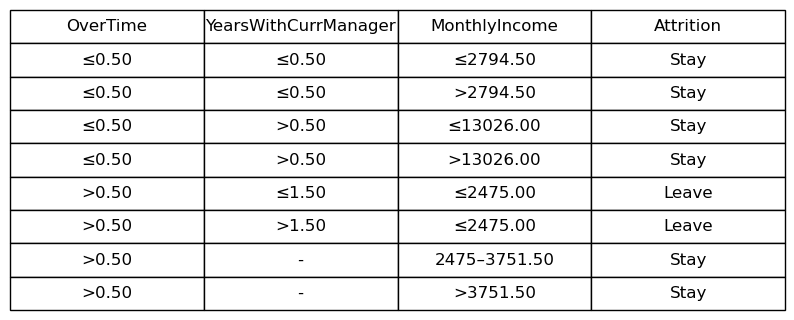

In [19]:
# 建立 DataFrame
data = {
    "OverTime": ["≤0.50","≤0.50","≤0.50","≤0.50",">0.50",">0.50",">0.50",">0.50"],
    "YearsWithCurrManager":["≤0.50","≤0.50",">0.50",">0.50","≤1.50",">1.50","-","-"],
    "MonthlyIncome":["≤2794.50",">2794.50","≤13026.00",">13026.00","≤2475.00","≤2475.00","2475–3751.50",">3751.50"],
    "Attrition":["Stay","Stay","Stay","Stay","Leave","Leave","Stay","Stay"]
}
df_tree = pd.DataFrame(data)

# 畫表格
fig, ax = plt.subplots(figsize=(10,3))
ax.axis('tight')
ax.axis('off')
tbl = ax.table(cellText=df_tree.values, colLabels=df_tree.columns, cellLoc='center', loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1,2)
plt.show()
